# Knn na doença não separável linearmente_res

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('c:\\dados\\nova_doenca2.csv',sep=';')
df.head()

indicador1  indicador2  diagnóstico
0           1           3            1
1           2           3            0
2           2           8            1
3           5           8            0
4           8          10            1

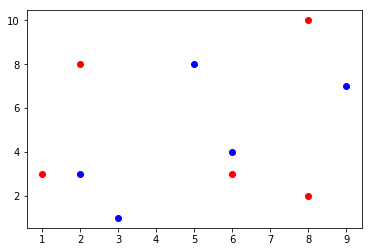

In [3]:
for i in range(len(df)):
    if df['diagnóstico'].iloc[i]==1:
        plt.plot(df.iloc[i,0],df.iloc[i,1],'ro')
    else:plt.plot(df.iloc[i,0],df.iloc[i,1],'bo')
plt.show()

A acurácia com regressão logística é de 0.5

Crie a função dist, com a distância Euclidiana entre dois vetores

In [4]:
def dist(v1,v2):
    
    return np.linalg.norm(v1-v2)



Teste a função dist com os vetores (1,1) e (2,2)...o resultado deve ser 1.414..

In [5]:
v1=np.array([1,1])
v2=np.array([2,2])
dist(v1,v2)

1.4142135623730951

Monte X e y, sem a coluna de 1's

In [7]:
X=np.zeros((len(df),2))
X[:,0]=df['indicador1']
X[:,1]=df['indicador2']
y=np.array(df['diagnóstico'])

Crie uma função v_dist que retornará um array (ordenado pela distância do vetor v a cada linha de X) com tuplas t, sendo t[0]:distância, t[1] a linha de X e t[2] o y correspondente à linha

In [8]:
def v_dist(v,X,y):
    vd=[]
    for i in range(len(y)):
        d=dist(v,X[i])
        vd.append((d,i,y[i]))
    vd.sort(key=lambda x:x[0])
    return np.array(vd)

Crie uma função de predição, que recebe v,X e y e retorna a classe prevista, suponha k=5

In [9]:
def predict(v,X,y):
    #coloque seu código aqui..supondo knn com k=5
    vd=v_dist(v,X,y)
    soma3=vd[0,2]+vd[1,2]+vd[2,2]+vd[3,2]+vd[4,2]
    if soma3>=3:return 1
    else:return 0    



Calcular a acurácia na amostra toda

In [10]:
ye=[]
for i in range(len(X)):
    ye.append(predict(X[i],X,y))
ye=np.array(ye)   
accuracy_score(ye,y)

0.6